In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
metoo_df = pd.read_csv("MeTooHate.csv")

In [3]:
metoo_df

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category
0,1046207313588236290,"Entitled, obnoxious, defensive, lying weasel. ...",2018-09-30T01:17:15Z,5,1,"McAllen, TX",2253,2303,23856,0
1,1046207328113086464,Thank you and for what you did for the women...,2018-09-30T01:17:19Z,5,2,"Tampa, FL",2559,4989,19889,0
2,1046207329589493760,Knitting (s) &amp; getting ready for January 1...,2018-09-30T01:17:19Z,0,0,"St Cloud, MN",16,300,9,0
3,1046207341283168256,Yep just like triffeling women weaponized thei...,2018-09-30T01:17:22Z,1,0,flyover country,3573,3732,38361,1
4,1046207347016826880,"No, the President wants to end movement posin...",2018-09-30T01:17:23Z,0,0,World,294,312,7635,0
...,...,...,...,...,...,...,...,...,...,...
807169,1097646408608505856,Let’s not forget that this “iconic kiss” was u...,2019-02-18T23:57:51Z,2,0,South Florida,206,412,1247,0
807170,1097646574686126081,DEFINITELY....the only one any of us should su...,2019-02-18T23:58:31Z,3,0,NaN,63,6,137,0
807171,1097646591882809350,Did the movement count the dollars of Erin An...,2019-02-18T23:58:35Z,0,0,Philly,2721,3509,66966,0
807172,1097646692877381632,This is one of my all time fav songs &amp; vid...,2019-02-18T23:58:59Z,1,1,"Berlin, Deutschland",2683,1011,15455,1


In [4]:
# Performing duplicate checks
duplicate_rows = metoo_df.duplicated()
no_of_duplicates = duplicate_rows.sum()

In [8]:
# Create a new DataFrame with only the necessary columns, ensuring it's a copy
Metoo_df_clean = metoo_df[["text", "favorite_count", "retweet_count", "followers_count", "friends_count", "statuses_count", "category"]].copy()

# Now you can safely rename the column without triggering the warning
Metoo_df_clean.rename(columns={"category": "Hateful"}, inplace=True)


In [9]:
# Removing white spaces and converting tweets to lowercases
Metoo_df_clean["text"] = Metoo_df_clean["text"].str.strip()
Metoo_df_clean["text"] = Metoo_df_clean["text"].str.lower()

In [10]:
# Checking for duplicates after cleaning
duplicates = Metoo_df_clean.duplicated(subset=["text"], keep=False)
no_of_duplicates = duplicates.sum()


In [11]:
no_of_duplicates

153792

In [12]:
# Removing duplicate records
Metoo_df_clean = Metoo_df_clean[~duplicates]


In [13]:
# Missing value checks
missing_values = Metoo_df_clean.isnull().sum()

In [14]:
# Checking the structure of the data
print(Metoo_df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 653382 entries, 0 to 807173
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   text             653382 non-null  object
 1   favorite_count   653382 non-null  int64 
 2   retweet_count    653382 non-null  int64 
 3   followers_count  653382 non-null  int64 
 4   friends_count    653382 non-null  int64 
 5   statuses_count   653382 non-null  int64 
 6   Hateful          653382 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 39.9+ MB
None


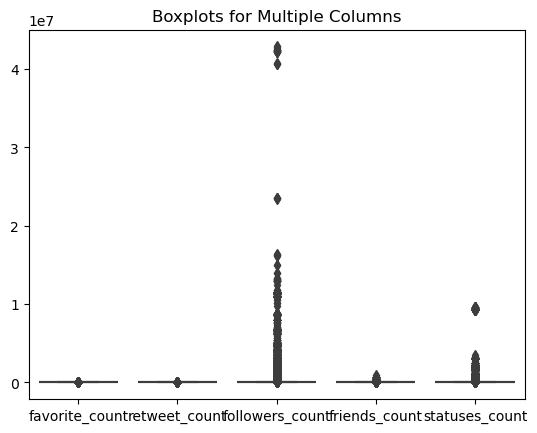

In [15]:
# Checking for outliers
sns.boxplot(data=Metoo_df_clean[["favorite_count", "retweet_count", "followers_count", "friends_count", "statuses_count"]])
plt.title("Boxplots for Multiple Columns")
plt.show()

In [16]:
print(Metoo_df_clean.describe())

       favorite_count  retweet_count  followers_count  friends_count  \
count   653382.000000  653382.000000     6.533820e+05  653382.000000   
mean         6.289149       2.413844     2.783582e+04    1770.584341   
std        144.317907      43.919669     4.238884e+05    7805.673211   
min          0.000000       0.000000     0.000000e+00       0.000000   
25%          0.000000       0.000000     9.600000e+01     154.000000   
50%          0.000000       0.000000     4.510000e+02     475.000000   
75%          2.000000       0.000000     2.118000e+03    1453.000000   
max      70385.000000   17484.000000     4.287280e+07  899383.000000   

       statuses_count        Hateful  
count    6.533820e+05  653382.000000  
mean     3.092750e+04       0.133055  
std      1.310478e+05       0.339635  
min      1.000000e+00       0.000000  
25%      1.388000e+03       0.000000  
50%      6.467000e+03       0.000000  
75%      2.473900e+04       0.000000  
max      9.565126e+06       1.000000  


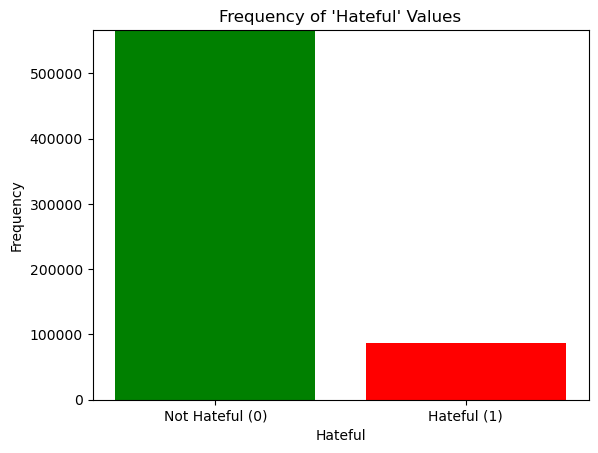

In [18]:
# Checking the distribution of the target variable
frequency = Metoo_df_clean["Hateful"].value_counts()
plt.bar(frequency.index, frequency.values, color=["green", "red"])
plt.title("Frequency of 'Hateful' Values")
plt.xlabel("Hateful")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=["Not Hateful (0)", "Hateful (1)"])
plt.ylim(0, frequency.max() + 1)
plt.show()

In [19]:
# Bivariate Analysis
summary_data = Metoo_df_clean.groupby("Hateful").agg(
    mean_favorite_count=("favorite_count", "mean"),
    mean_retweet_count=("retweet_count", "mean"),
    mean_statuses_count=("statuses_count", "mean"),
    mean_followers_count=("followers_count", "mean"),
    mean_friends_count=("friends_count", "mean")
).reset_index()

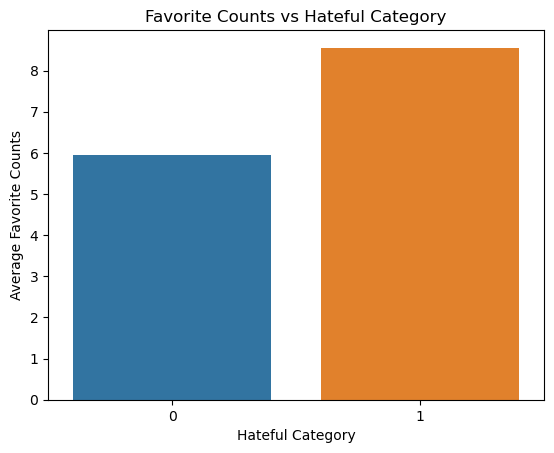

In [20]:
# Favorite counts vs Hateful
sns.barplot(x="Hateful", y="mean_favorite_count", data=summary_data)
plt.title("Favorite Counts vs Hateful Category")
plt.xlabel("Hateful Category")
plt.ylabel("Average Favorite Counts")
plt.show()

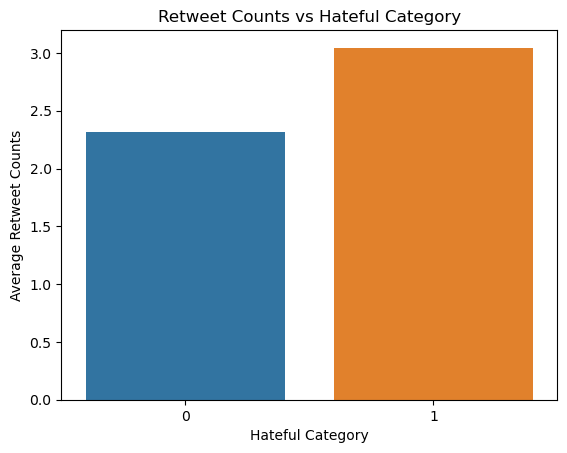

In [21]:
# Retweet counts vs Hateful
sns.barplot(x="Hateful", y="mean_retweet_count", data=summary_data)
plt.title("Retweet Counts vs Hateful Category")
plt.xlabel("Hateful Category")
plt.ylabel("Average Retweet Counts")
plt.show()

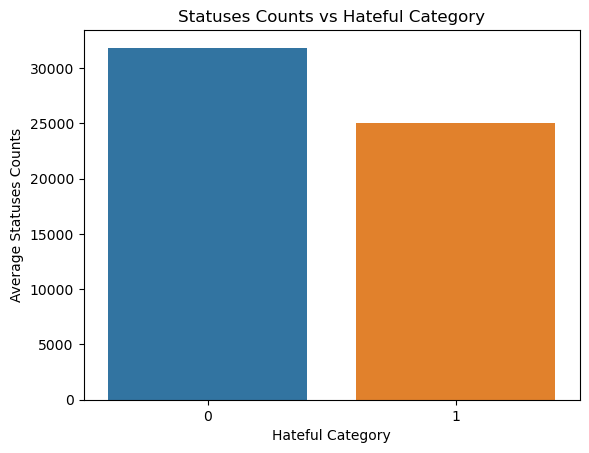

In [22]:
# Statuses counts vs Hateful
sns.barplot(x="Hateful", y="mean_statuses_count", data=summary_data)
plt.title("Statuses Counts vs Hateful Category")
plt.xlabel("Hateful Category")
plt.ylabel("Average Statuses Counts")
plt.show()

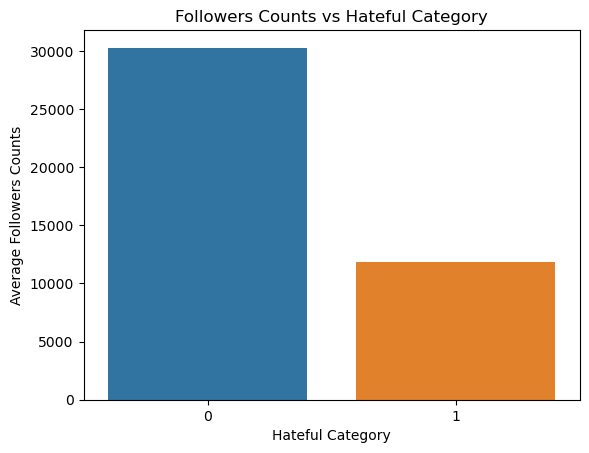

In [23]:
# Followers counts vs Hateful
sns.barplot(x="Hateful", y="mean_followers_count", data=summary_data)
plt.title("Followers Counts vs Hateful Category")
plt.xlabel("Hateful Category")
plt.ylabel("Average Followers Counts")
plt.show()


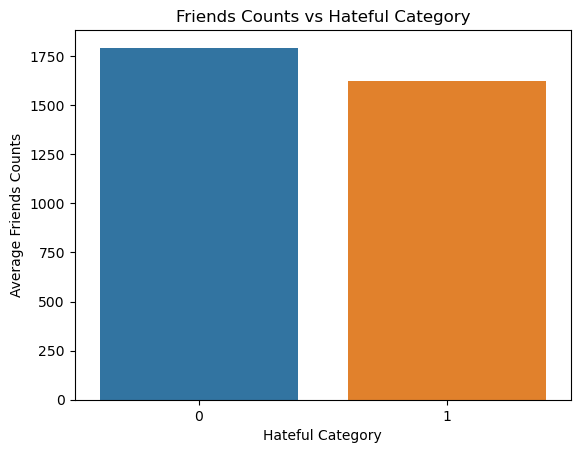

In [24]:

# Friends counts vs Hateful
sns.barplot(x="Hateful", y="mean_friends_count", data=summary_data)
plt.title("Friends Counts vs Hateful Category")
plt.xlabel("Hateful Category")
plt.ylabel("Average Friends Counts")
plt.show()